# Perceptron

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv(r"placement.csv")
df.shape

(100, 4)

In [65]:
df = df.drop(df.columns[[0]], axis=1)


In [66]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<Axes: xlabel='cgpa', ylabel='iq'>

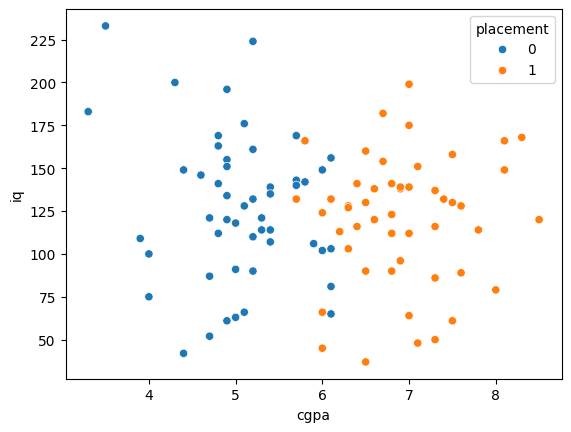

In [67]:
sns.scatterplot(x=df["cgpa"],y=df["iq"],hue=df["placement"])

In [68]:
from sklearn.linear_model import Perceptron
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

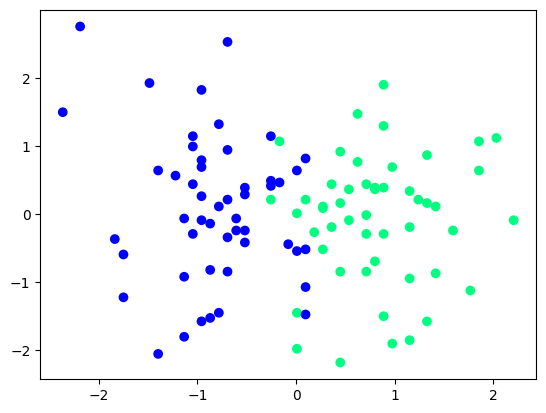

In [73]:
from sklearn.preprocessing import StandardScaler

# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train the model on scaled data
clf = Perceptron(random_state=0)
clf.fit(X_scaled, y)

# 3. Important: Scale your meshgrid points before predicting
# This ensures the shaded background matches the scaled model
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = clf.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# 4. Plotting
# Note: Since the model was trained on scaled data, 
# you should plot the scaled version of X as well
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='winter')
# ... rest of your plotting code using scaled coordinates

In [70]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.5))

In [71]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

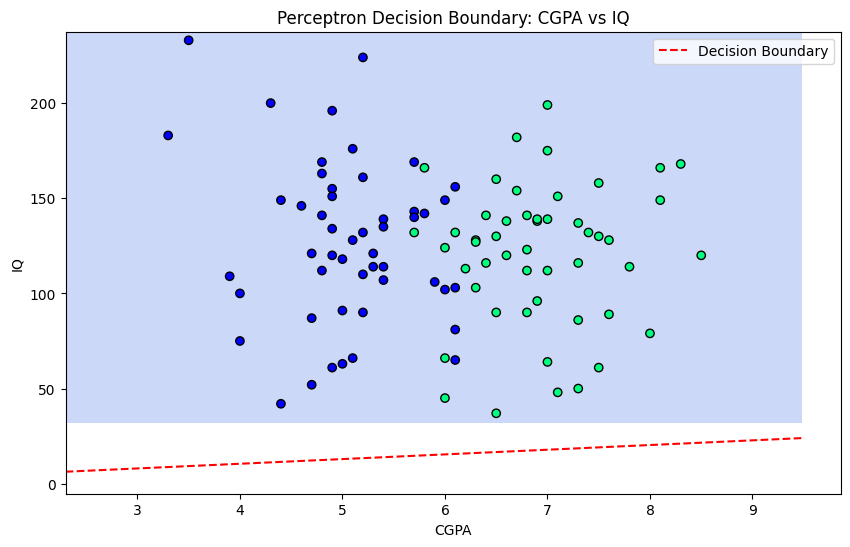

In [72]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
w = clf.coef_[0]
b = clf.intercept_[0]
x_boundary = np.array([x_min, x_max])
y_boundary = -(w[0]/w[1]) * x_boundary - (b/w[1])

plt.plot(x_boundary, y_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary: CGPA vs IQ')
plt.legend()
plt.show()

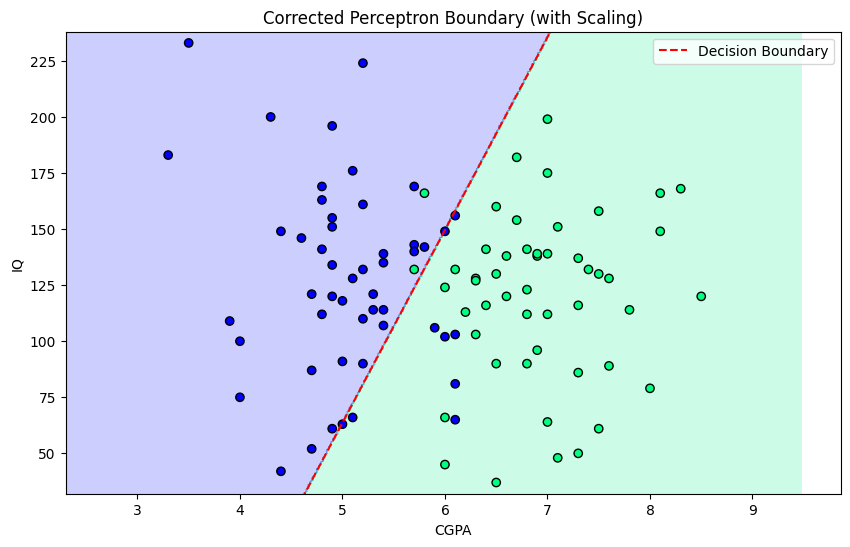

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# 1. Prepare Data
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

# 2. Scale Features (Crucial step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train Perceptron on scaled data
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_scaled, y)

# 4. Create Meshgrid for plotting (Original Units)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.5))

# 5. Predict: We must scale the meshgrid points before passing them to the model
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = clf.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# 6. Plotting
plt.figure(figsize=(10, 6))

# Decision Regions
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')

# Original Data Points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')

# 7. Calculate the Decision Boundary Line for the plot
# Formula in scaled space: w1*x_s + w2*y_s + b = 0
# To plot in original space, we use the model's coefficients
w = clf.coef_[0]
b = clf.intercept_[0]

# We calculate the line where the model transitions (at 0)
# Note: Since the model is trained on SCALED data, simple y = mx + c 
# on raw values won't work easily. The contourf above already shows 
# the boundary perfectly, but here is how to draw the line manually:
x_boundary = np.linspace(x_min, x_max, 100)
# This finds the 'y' value that makes the prediction 0
y_boundary = (-(w[0] * (x_boundary - scaler.mean_[0]) / scaler.scale_[0]) - b) * (scaler.scale_[1] / w[1]) + scaler.mean_[1]

plt.plot(x_boundary, y_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Corrected Perceptron Boundary (with Scaling)')
plt.ylim(y_min, y_max)
plt.legend()
plt.show()